# Import FosforML library 

In [1]:
!pip install --q seaborn

ERROR: fosforml 1.0.0 has requirement urllib3==1.26.15, but you'll have urllib3 2.2.1 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement packaging<24,>=20.9, but you'll have packaging 24.1 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement pandas<2,>=1.0.0, but you'll have pandas 2.0.3 which is incompatible.
ERROR: snowflake-ml-python 1.0.1 has requirement snowflake-snowpark-python<2,>=1.4.0, but you'll have snowflake-snowpark-python 1.0.0 which is incompatible.
ERROR: snowflake-connector-python 3.6.0 has requirement urllib3<2.0.0,>=1.21.1; python_version < "3.10", but you'll have urllib3 2.2.1 which is incompatible.
ERROR: openapi-spec-validator 0.7.1 has requirement jsonschema<5.0.0,>=4.18.0, but you'll have jsonschema 3.2.0 which is incompatible.
ERROR: openapi-schema-validator 0.6.2 has requirement jsonschema<5.0.0,>=4.19.1, but you'll have jsonschema 3.2.0 which is incompatible.
ERROR: mosaic-ai-serving 1.0.0 has requirement Flask==2.1.1; 

In [3]:
!pip install fosforml==1.0.1

     |████████████████████████████████| 51kB 4.4MB/s eta 0:00:011
     |████████████████████████████████| 122kB 4.9MB/s eta 0:00:01
     |████████████████████████████████| 737kB 27.6MB/s eta 0:00:01
     |████████████████████████████████| 17.3MB 73.0MB/s eta 0:00:01
     |████████████████████████████████| 71kB 80.1MB/s eta 0:00:01
     |████████████████████████████████| 61kB 73.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 68.4MB/s eta 0:00:01
     |████████████████████████████████| 9.8MB 54.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 75.5MB/s eta 0:00:01
     |████████████████████████████████| 34.5MB 78.1MB/s eta 0:00:01
     |████████████████████████████████| 307kB 86.1MB/s eta 0:00:01
     |████████████████████████████████| 143kB 81.8MB/s eta 0:00:01
     |████████████████████████████████| 174kB 85.1MB/s eta 0:00:01
     |████████████████████████████████| 71kB 8.1MB/s eta 0:00:01
Failed to build shutils
ERROR: snowflake-snowpark-python 1.0.0 has r

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
from fosforml import *

ImportError: cannot import name 'appengine' from 'urllib3.contrib' (/packages/Python-3.8-Snowpark/c98ef628-63be-4a89-bd1c-9d3426298d93/3.8/urllib3/contrib/__init__.py)

In [2]:
import seaborn as sns

Matplotlib created a temporary cache directory at /tmp/matplotlib-6xw10yhr because the default path (/home/mosaic-ai/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [5]:
#estblishing connection between notebook and snowflake
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt



import time
from snowflake.snowpark.session import Session
import configparser

import warnings
warnings.filterwarnings("ignore")

config = configparser.ConfigParser()
config.read("snowflake_connection.ini")

connection_parameters = {
    "user": f'{config["Snowflake"]["user"]}',
    "password": f'{config["Snowflake"]["password"]}',
    "account": f'{config["Snowflake"]["account"]}',
    "WAREHOUSE": f'{config["Snowflake"]["WAREHOUSE"]}',
    "DATABASE": f'{config["Snowflake"]["DATABASE"]}',
    "SCHEMA": f'{config["Snowflake"]["SCHEMA"]}'
}

def snowflake_connector(conn):
    try:
        session = Session.builder.configs(conn).create()
        print("connection successful!")
    except:
        raise ValueError("error while connecting with db")
    return session

session = snowflake_connector(connection_parameters)


connection successful!


In [6]:
sales_bangalore_2022 = session.table("SOL_ASSORTMENT_PLANNING_COMB").to_pandas()

In [7]:
sales_bangalore_2022.head()

,TRANSACTION_DATE,MNTH_CODE,SALES_VALUE,SALES_UNITS,SALES_VOLUME,SALES_PTR_VALUE,DISTRIBUTOR_CODE,PRODUCT_CODE,OUTLET_CODE,CITY,STATE,COUNTY,STREET,CATEGORY,VARIANT,BRAND
0,2023-07-01,202203,460.91,3,0.002700,460.909091,DB0706,PRD0041,OL81278,Montclair,New Jersey,Dolphin,Str1,Soap,Beauty Soap,Charcoal
1,2023-07-01,202203,277.14,32,0.000832,285.714286,DB0706,PRD0069,OL206924,Breckenridge,Colorado,Dolphin,Str2,Perfume and Deodrants,Female Deodrant,Arctic blue
2,2023-07-01,202203,636.36,4,0.001200,636.363636,DB0706,PRD0078,OL81756,Tucson,Arizona,City Center,Str1,Lotion,Head Lotion,Saffron
3,2023-07-01,202203,138.57,16,0.000400,142.857143,DB0209,PRD0147,OL238948,San Pedro,California,Orange,Str5,Kids Care,Baby Cream,Mint
4,2023-07-01,202203,142.86,16,0.000416,142.857143,DB0110,PRD0069,OL81622,Orange,Connecticut,Silver,Str5,Perfume and Deodrants,Female Deodrant,Arctic blue


TypeError: 'Axes' object is not subscriptable

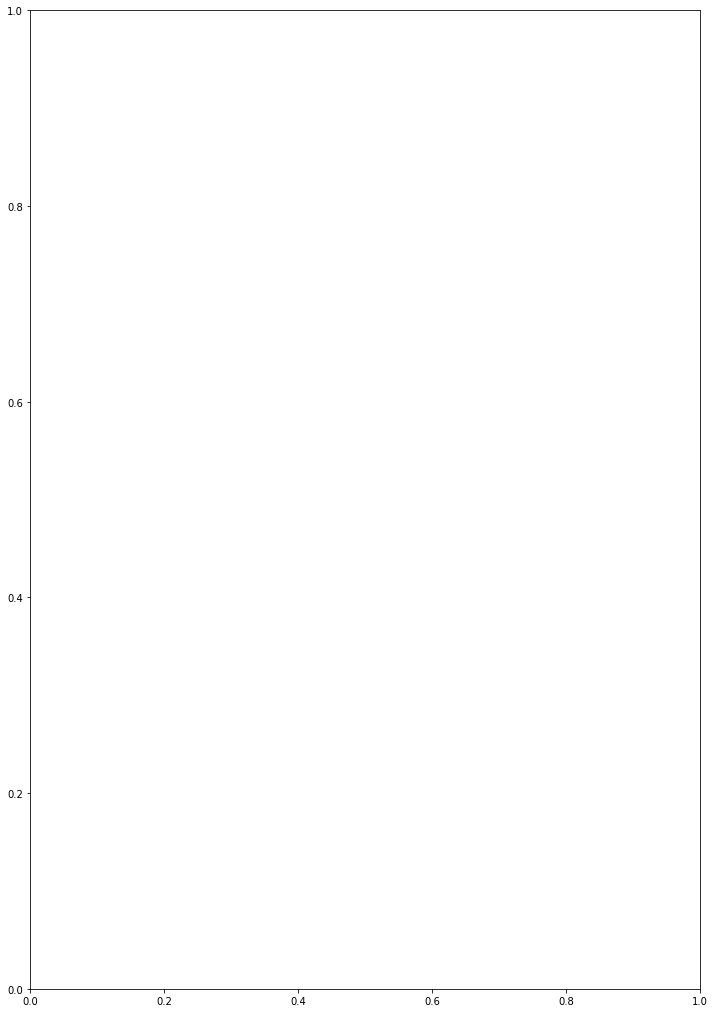

In [11]:
fig, axarr = plt.subplots(1,1, figsize=(12, 18))
sales_bangalore_2022.groupby('CITY')['SALES_PTR_VALUE'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("City Vs Sales", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
#sns.despine()

In [12]:
sales_bangalore_2022.describe().T

,count,mean,std,min,25%,50%,75%,max
MNTH_CODE,966400.0,202206.573263,3.404526,202201.000000,202204.000000,202207.000000,202209.0000,202212.0000
SALES_VALUE,966400.0,446.417454,1053.355633,2.860000,140.000000,192.240000,450.0000,145728.1200
SALES_UNITS,966400.0,12.696476,40.761336,1.000000,2.000000,6.000000,16.0000,10240.0000
SALES_VOLUME,966400.0,0.000931,0.002063,0.000011,0.000368,0.000448,0.0009,0.2755
SALES_PTR_VALUE,966400.0,457.814679,1101.769102,1.785714,142.857143,198.181818,450.0000,151800.0000


In [13]:
cat_cols=sales_bangalore_2022.select_dtypes(include=['object']).columns
num_cols = sales_bangalore_2022.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['TRANSACTION_DATE', 'DISTRIBUTOR_CODE', 'PRODUCT_CODE', 'OUTLET_CODE',
       'CITY', 'STATE', 'COUNTY', 'STREET', 'CATEGORY', 'VARIANT', 'BRAND'],
      dtype='object')
Numerical Variables:
['MNTH_CODE', 'SALES_VALUE', 'SALES_UNITS', 'SALES_VOLUME', 'SALES_PTR_VALUE']


MNTH_CODE
Skew : -0.01


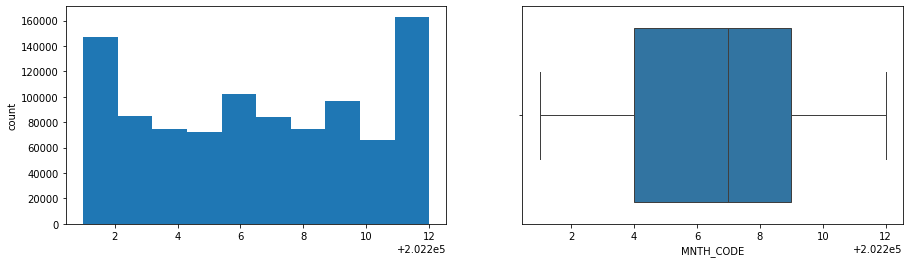

SALES_VALUE
Skew : 33.87


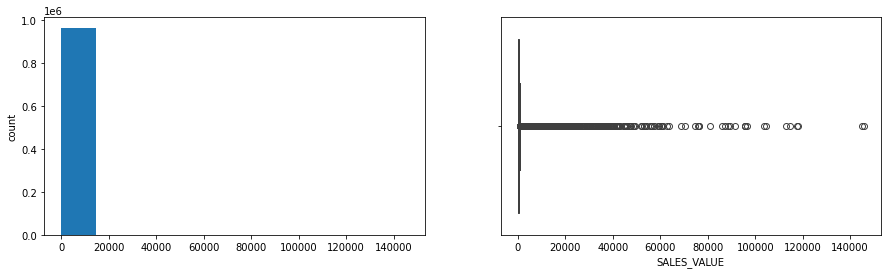

SALES_UNITS
Skew : 57.47


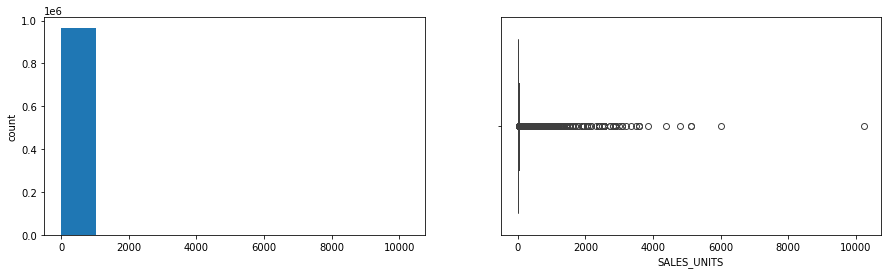

SALES_VOLUME
Skew : 34.22


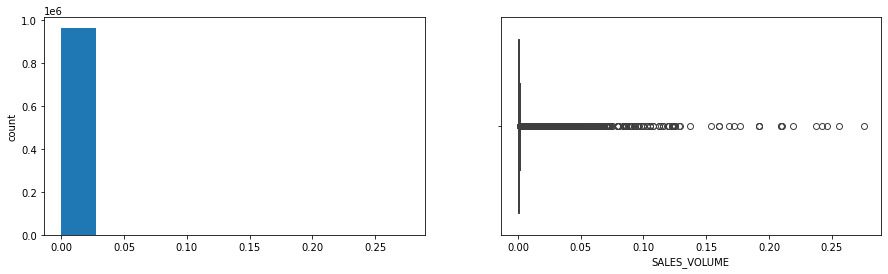

SALES_PTR_VALUE
Skew : 32.66


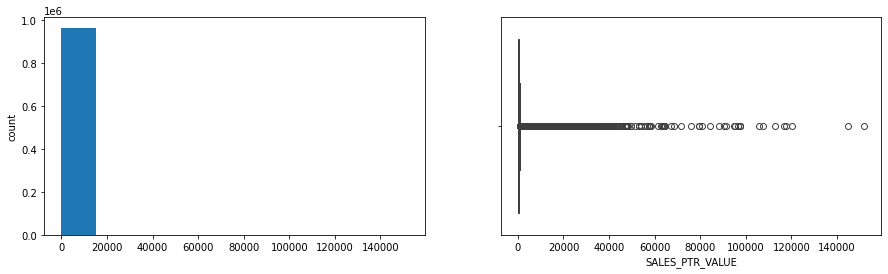

In [17]:
for col in num_cols:
    print(col)
    print('Skew :', round(sales_bangalore_2022[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sales_bangalore_2022[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=sales_bangalore_2022[col])
    plt.show()

In [ ]:
fig, axes = plt.subplots(6, 1, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0], x = 'CITY', data = sales_bangalore_2022, color = 'blue', 
              order = sales_bangalore_2022['CITY'].value_counts().index);
sns.countplot(ax = axes[1], x = 'CATEGORY', data = sales_bangalore_2022, color = 'blue', 
              order = sales_bangalore_2022['CATEGORY'].value_counts().index);
sns.countplot(ax = axes[2], x = 'BRAND', data = sales_bangalore_2022, color = 'blue', 
              order = sales_bangalore_2022['BRAND'].value_counts().index);
sns.countplot(ax = axes[3], x = 'PRODUCT_CODE', data = sales_bangalore_2022, color = 'blue', 
              order = sales_bangalore_2022['PRODUCT_CODE'].value_counts().index);
sns.countplot(ax = axes[4], x = 'OUTLET_CODE', data = sales_bangalore_2022, color = 'blue', 
              order = sales_bangalore_2022['OUTLET_CODE'].head(20).value_counts().index);
sns.countplot(ax = axes[5], x = 'STATE', data = sales_bangalore_2022, color = 'blue', 
              order = sales_bangalore_2022['STATE'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);